Features of the Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

/Users/anirbandey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anirbandey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


Feature Importances for Decision Tree (Gini):
                         Feature  Importance
6                     flavanoids    0.419012
9                color_intensity    0.392388
12                       proline    0.167252
2                            ash    0.021348
0                        alcohol    0.000000
1                     malic_acid    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000


/var/folders/xg/cfswnj_j6_1fg5f4_rrdkwzw0000gn/T/ipykernel_6187/2432238817.py:115: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)



Feature Importances for Decision Tree (Entropy):
                         Feature  Importance
11  od280/od315_of_diluted_wines    0.446325
0                        alcohol    0.305952
12                       proline    0.088429
9                color_intensity    0.076025
6                     flavanoids    0.052071
4                      magnesium    0.031199
1                     malic_acid    0.000000
2                            ash    0.000000
3              alcalinity_of_ash    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


/var/folders/xg/cfswnj_j6_1fg5f4_rrdkwzw0000gn/T/ipykernel_6187/2432238817.py:115: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


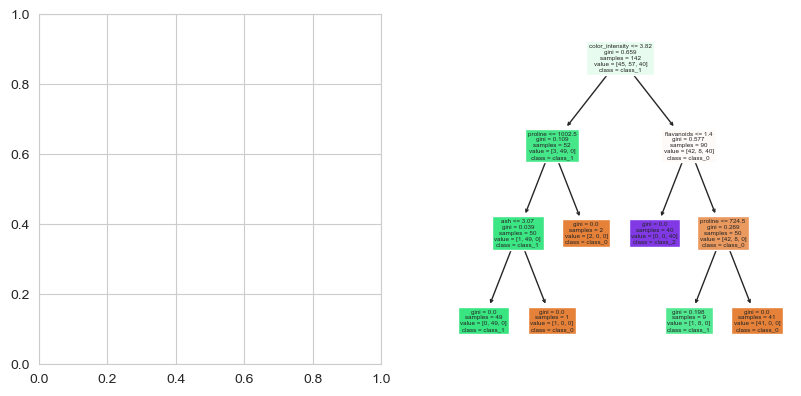

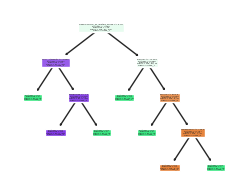

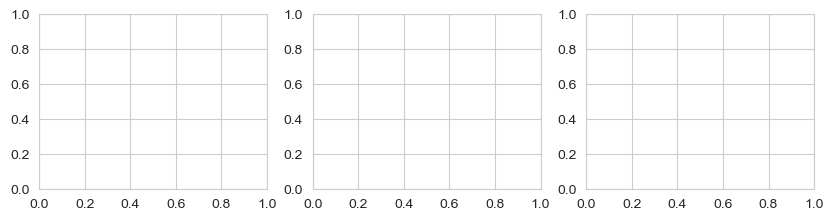

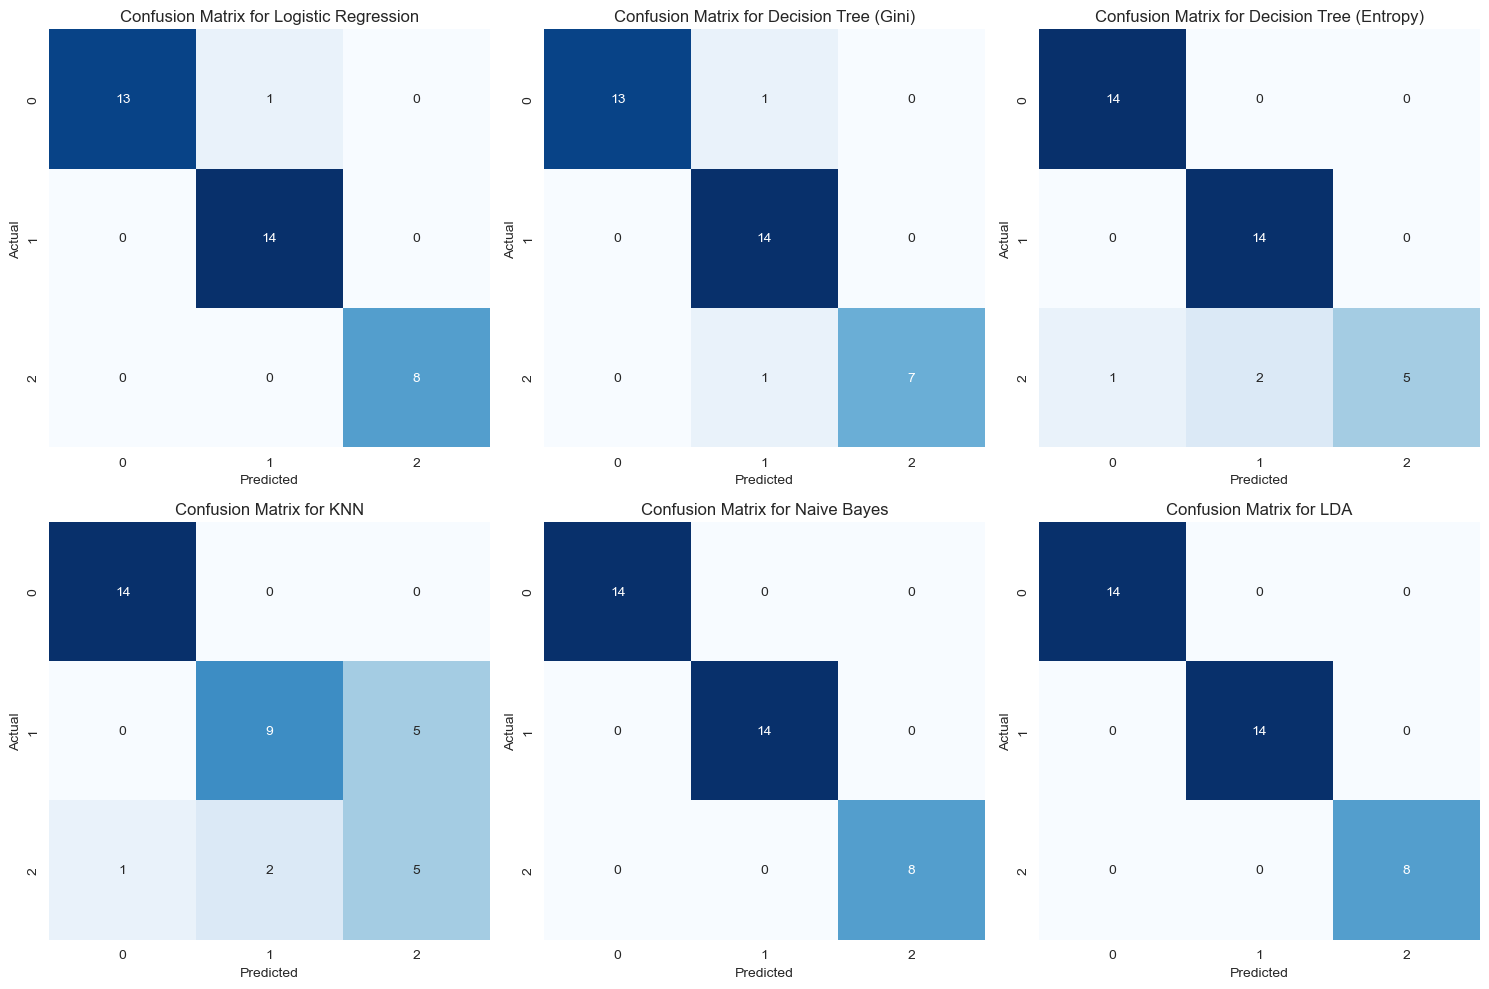

<Figure size 1500x800 with 0 Axes>

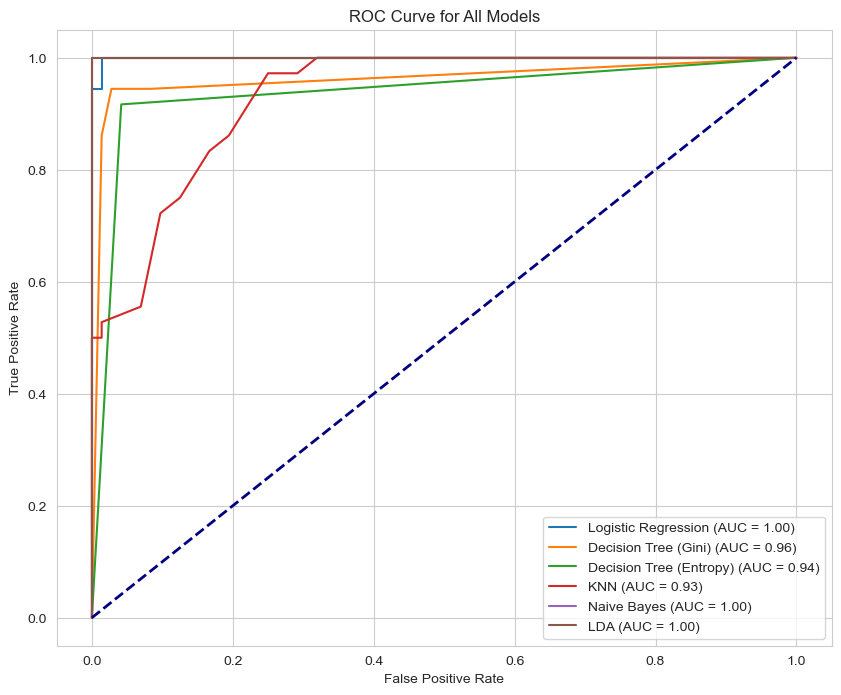

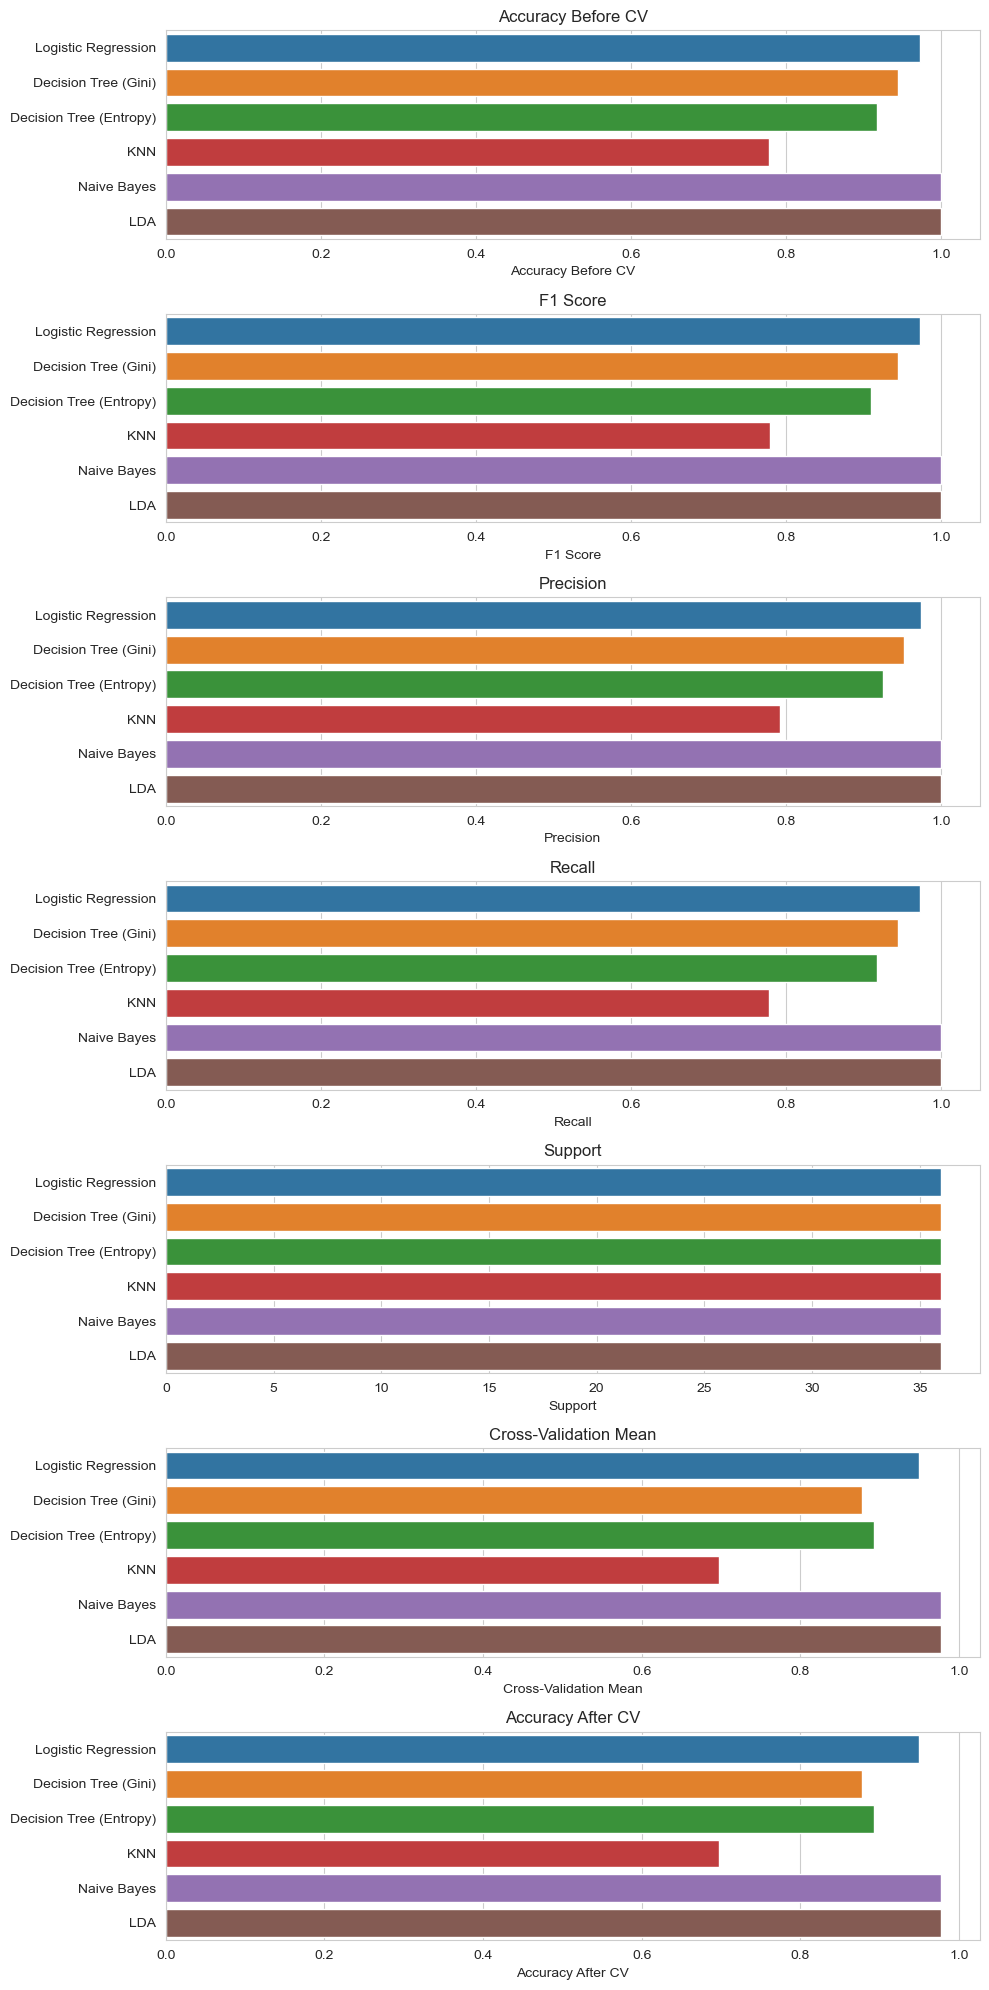


Metrics Before and After Cross-Validation:
                     Model  Accuracy Before CV  F1 Score  Precision    Recall  \
0      Logistic Regression            0.972222  0.972187   0.974074  0.972222   
1     Decision Tree (Gini)            0.944444  0.944856   0.951389  0.944444   
2  Decision Tree (Entropy)            0.916667  0.909382   0.925463  0.916667   
3                      KNN            0.777778  0.778936   0.792256  0.777778   
4              Naive Bayes            1.000000  1.000000   1.000000  1.000000   
5                      LDA            1.000000  1.000000   1.000000  1.000000   

   Support                            Cross-Validation Scores  \
0     36.0  [0.8333333333333334, 0.9444444444444444, 0.888...   
1     36.0  [0.8888888888888888, 0.8888888888888888, 0.722...   
2     36.0  [0.8888888888888888, 0.9444444444444444, 0.722...   
3     36.0  [0.7777777777777778, 0.7222222222222222, 0.666...   
4     36.0  [0.9444444444444444, 1.0, 1.0, 0.9444444444444...  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from scipy import interp

# Load wine dataset;
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Display all features of the dataset
print("Features of the Wine dataset:")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree (Gini)': DecisionTreeClassifier(criterion='gini'),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion='entropy'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis()
}

# Optimal value of k for KNN
param_grid_knn = {'n_neighbors': np.arange(1, 30)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
optimal_k = grid_search_knn.best_params_['n_neighbors']

# Optimal depth for Decision Tree
param_grid_tree = {'max_depth': np.arange(1, 20)}
grid_search_tree_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid_tree, cv=5)
grid_search_tree_gini.fit(X_train, y_train)
optimal_depth_gini = grid_search_tree_gini.best_params_['max_depth']

grid_search_tree_entropy = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid_tree, cv=5)
grid_search_tree_entropy.fit(X_train, y_train)
optimal_depth_entropy = grid_search_tree_entropy.best_params_['max_depth']

# Optimal parameter for Logistic Regression
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train, y_train)
optimal_c_logistic = grid_search_logistic.best_params_['C']

# Optimal parameter for Naive Bayes
optimal_params_naive_bayes = {}  # Naive Bayes typically doesn't require hyperparameter tuning

# Optimal parameter for LDA
optimal_params_lda = {}  # LDA typically doesn't have many hyperparameters to tune

# Evaluate models
model_results = {}

# Data for ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

# Data for Cross-Validation Accuracy vs Folds
cv_accuracies = {}

# Data for Cross-Validation Mean
cv_means = []

# Data for Confusion Matrices
confusion_matrices = {}

# Data for feature importances
feature_importances = {}

# Data for probability distributions
probability_distributions = {}

# Data for Accuracy Before Cross-Validation
accuracy_before_cv = {}

# Data for F1 Score
f1_scores = {}

# Data for Precision
precision_scores = {}

# Data for Recall
recall_scores = {}

# Data for Support
support_data = {}

# Data for Cross-Validation Scores
cv_scores_data = {}

# Data for Accuracy After Cross-Validation
accuracy_after_cv = {}

# Optimal Parameters
optimal_parameters = {}

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    if name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=optimal_k)
        optimal_parameters[name] = f'n_neighbors = {optimal_k}'
    elif 'Decision Tree' in name:
        if 'Gini' in name:
            model = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth_gini)
            optimal_parameters[name] = f'max_depth = {optimal_depth_gini}'
        else:
            model = DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth_entropy)
            optimal_parameters[name] = f'max_depth = {optimal_depth_entropy}'
    elif name == 'Logistic Regression':
        model = LogisticRegression(C=optimal_c_logistic)
        optimal_parameters[name] = f'C = {optimal_c_logistic}'
    else:
        optimal_parameters[name] = None

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
        feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
        print(f"\nFeature Importances for {name}:")
        print(feature_importances_df)

    # Probability Distributions
    probability_distributions[name] = model.predict_proba(X_test)

    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = confusion

    # Cross-validation across several folds
    cv_scores = cross_val_score(model, X, y, cv=10)
    cv_mean = np.mean(cv_scores)
    cv_accuracies[name] = cv_scores
    cv_means.append(cv_mean)  # Save Cross-Validation Mean

    # ROC curve and AUC
    y_scores = model.predict_proba(X_test)
    y_binarized = label_binarize(y_test, classes=[0, 1, 2])

    fpr, tpr, _ = roc_curve(y_binarized.ravel(), y_scores.ravel())
    mean_tpr += np.interp(all_fpr, fpr, tpr)

    roc_auc = auc(fpr, tpr)

    # Save results
    model_results[name] = {
        'Model': model,
        'Accuracy Before CV': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Support': classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)['macro avg']['support'],
        'Cross-Validation Scores': cv_scores,
        'Accuracy After CV': cv_mean,
        'ROC Curve': (fpr, tpr, roc_auc),
        'Optimal Parameters': optimal_parameters[name]
    }

    # Save metrics for table data
    accuracy_before_cv[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    support_data[name] = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)['macro avg']['support']
    cv_scores_data[name] = cv_scores
    accuracy_after_cv[name] = cv_mean

    # Plot Decision Tree for Decision Tree model
    if 'Decision Tree' in name:
        plt.title(f'Decision Tree - {name.split(" ")[-1]} - Depth {optimal_depth_gini if "Gini" in name else optimal_depth_entropy}')
        plot_tree(model, filled=True, feature_names=X.columns, class_names=wine.target_names)

        # Save PDF for Decision Trees
        plt.figure(figsize=(10, 5))
        plot_tree(model, filled=True, feature_names=X.columns, class_names=wine.target_names)
        plt.title(f'Decision Tree - {name.split(" ")[-1]} - Optimal Depth')
        plt.savefig(f'decision_tree_{name.lower().replace(" ", "_")}.pdf', format='pdf', bbox_inches='tight')

# Display Confusion Matrices using seaborn
plt.figure(figsize=(15, 10))
for i, (name, confusion) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')

plt.tight_layout()
plt.show()

# Display Pair Plot for KNN
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
X_train_knn = X_train.copy()
X_train_knn['target'] = y_train
plt.figure(figsize=(15, 8))
sns.pairplot(X_train_knn, hue='target', palette='viridis')
plt.suptitle('Pair Plot for KNN', y=1.02)
plt.show()

# Display Histogram for Probability Distribution of Naive Bayes
plt.figure(figsize=(10, 6))
for class_label in range(probability_distributions['Naive Bayes'].shape[1]):
    plt.subplot(2, 3, class_label + 1)
    sns.histplot(probability_distributions['Naive Bayes'][:, class_label], bins=20, kde=True, label='Naive Bayes', alpha=0.7)
    plt.title(f'Class {class_label} - Naive Bayes')

plt.tight_layout()
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Display ROC curve for all models
plt.figure(figsize=(10, 8))
for name, result in model_results.items():
    plt.plot(result['ROC Curve'][0], result['ROC Curve'][1], label=f'{name} (AUC = {result["ROC Curve"][2]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()

# Display Metrics for Various Models with Model Name on Y-axis
metrics_data = {
    'Accuracy Before CV': list(accuracy_before_cv.values()),
    'F1 Score': list(f1_scores.values()),
    'Precision': list(precision_scores.values()),
    'Recall': list(recall_scores.values()),
    'Support': list(support_data.values()),
    'Cross-Validation Mean': list(accuracy_after_cv.values()),
    'Accuracy After CV': list(accuracy_after_cv.values())
}

metrics_df = pd.DataFrame(metrics_data, index=models.keys())

# Set up subplots
fig, axes = plt.subplots(nrows=7, figsize=(10, 20))

# Plot Accuracy Before CV
sns.barplot(x=metrics_df['Accuracy Before CV'], y=metrics_df.index, ax=axes[0])
axes[0].set_title('Accuracy Before CV')

# Plot F1 Score
sns.barplot(x=metrics_df['F1 Score'], y=metrics_df.index, ax=axes[1])
axes[1].set_title('F1 Score')

# Plot Precision
sns.barplot(x=metrics_df['Precision'], y=metrics_df.index, ax=axes[2])
axes[2].set_title('Precision')

# Plot Recall
sns.barplot(x=metrics_df['Recall'], y=metrics_df.index, ax=axes[3])
axes[3].set_title('Recall')

# Plot Support
sns.barplot(x=metrics_df['Support'], y=metrics_df.index, ax=axes[4])
axes[4].set_title('Support')

# Plot Cross-Validation Mean
sns.barplot(x=metrics_df['Cross-Validation Mean'], y=metrics_df.index, ax=axes[5])
axes[5].set_title('Cross-Validation Mean')

# Plot Accuracy After CV
sns.barplot(x=metrics_df['Accuracy After CV'], y=metrics_df.index, ax=axes[6])
axes[6].set_title('Accuracy After CV')

# Adjust layout
plt.tight_layout()
plt.show()


# Display Table for Metrics
metrics_table = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy Before CV': list(accuracy_before_cv.values()),
    'F1 Score': list(f1_scores.values()),
    'Precision': list(precision_scores.values()),
    'Recall': list(recall_scores.values()),
    'Support': list(support_data.values()),
    'Cross-Validation Scores': [list(scores) for scores in cv_scores_data.values()],
    'Accuracy After CV': list(accuracy_after_cv.values()),
    'Optimal Parameters': [optimal_parameters.get(model, None) for model in models.keys()]
})

print("\nMetrics Before and After Cross-Validation:")
print(metrics_table)

# Display Classification Report for all models
for name, result in model_results.items():
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, result['Model'].predict(X_test), target_names=wine.target_names))

# Identify the best model based on Cross-Validation Mean
best_model_name = max(model_results, key=lambda k: model_results[k]['Cross-Validation Scores'].mean())
best_model = model_results[best_model_name]

# Display metrics for the best model
print("\nMetrics for the Best Model:")
print(f"Best Model: {best_model_name}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_model['Model'].predict(X_test))}")
print(f"Accuracy Before CV: {best_model['Accuracy Before CV']:.4f}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"Support: {best_model['Support']}")
print(f"Cross-Validation Mean: {best_model['Accuracy After CV']:.4f}")
print(f"Optimal Parameters: {best_model['Optimal Parameters']}")


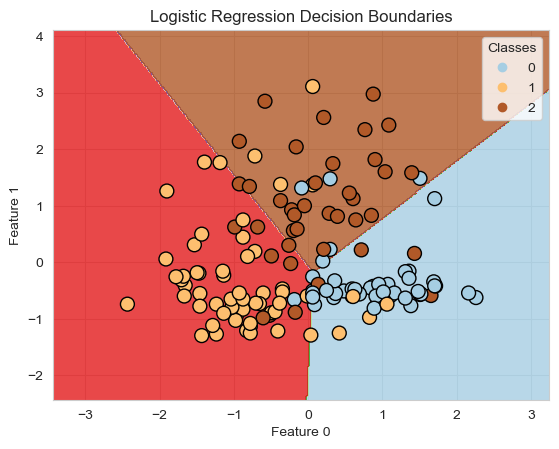

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Select two features for visualization
feature1 = 0  # Index of the first feature
feature2 = 1  # Index of the second feature

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, [feature1, feature2]], y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)

# Plot the decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, feature1].min() - 1, X[:, feature1].max() + 1
y_min, y_max = X[:, feature2].min() - 1, X[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, s=100)
legend = plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel(f'Feature {feature1}')
plt.ylabel(f'Feature {feature2}')
plt.show()


Features of the Wine dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

/Users/anirbandey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anirbandey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l


Feature Importances for Decision Tree (Gini):
                         Feature  Importance
6                     flavanoids    0.419012
9                color_intensity    0.392388
12                       proline    0.167252
2                            ash    0.021348
0                        alcohol    0.000000
1                     malic_acid    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000
11  od280/od315_of_diluted_wines    0.000000


/var/folders/xg/cfswnj_j6_1fg5f4_rrdkwzw0000gn/T/ipykernel_6187/2491029162.py:115: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)



Feature Importances for Decision Tree (Entropy):
                         Feature  Importance
11  od280/od315_of_diluted_wines    0.460698
0                        alcohol    0.315804
12                       proline    0.091277
9                color_intensity    0.078474
6                     flavanoids    0.053747
1                     malic_acid    0.000000
2                            ash    0.000000
3              alcalinity_of_ash    0.000000
4                      magnesium    0.000000
5                  total_phenols    0.000000
7           nonflavanoid_phenols    0.000000
8                proanthocyanins    0.000000
10                           hue    0.000000


/var/folders/xg/cfswnj_j6_1fg5f4_rrdkwzw0000gn/T/ipykernel_6187/2491029162.py:115: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


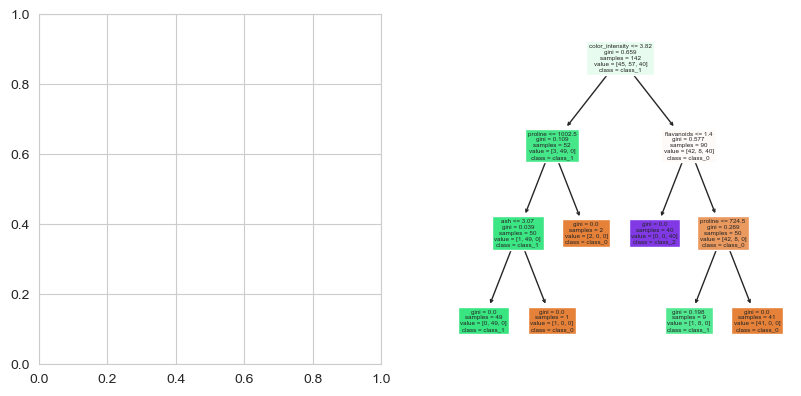

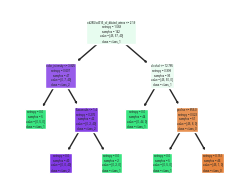

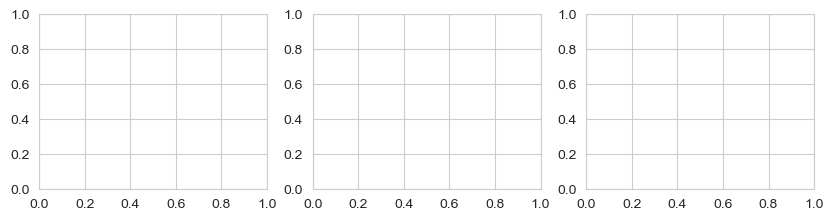

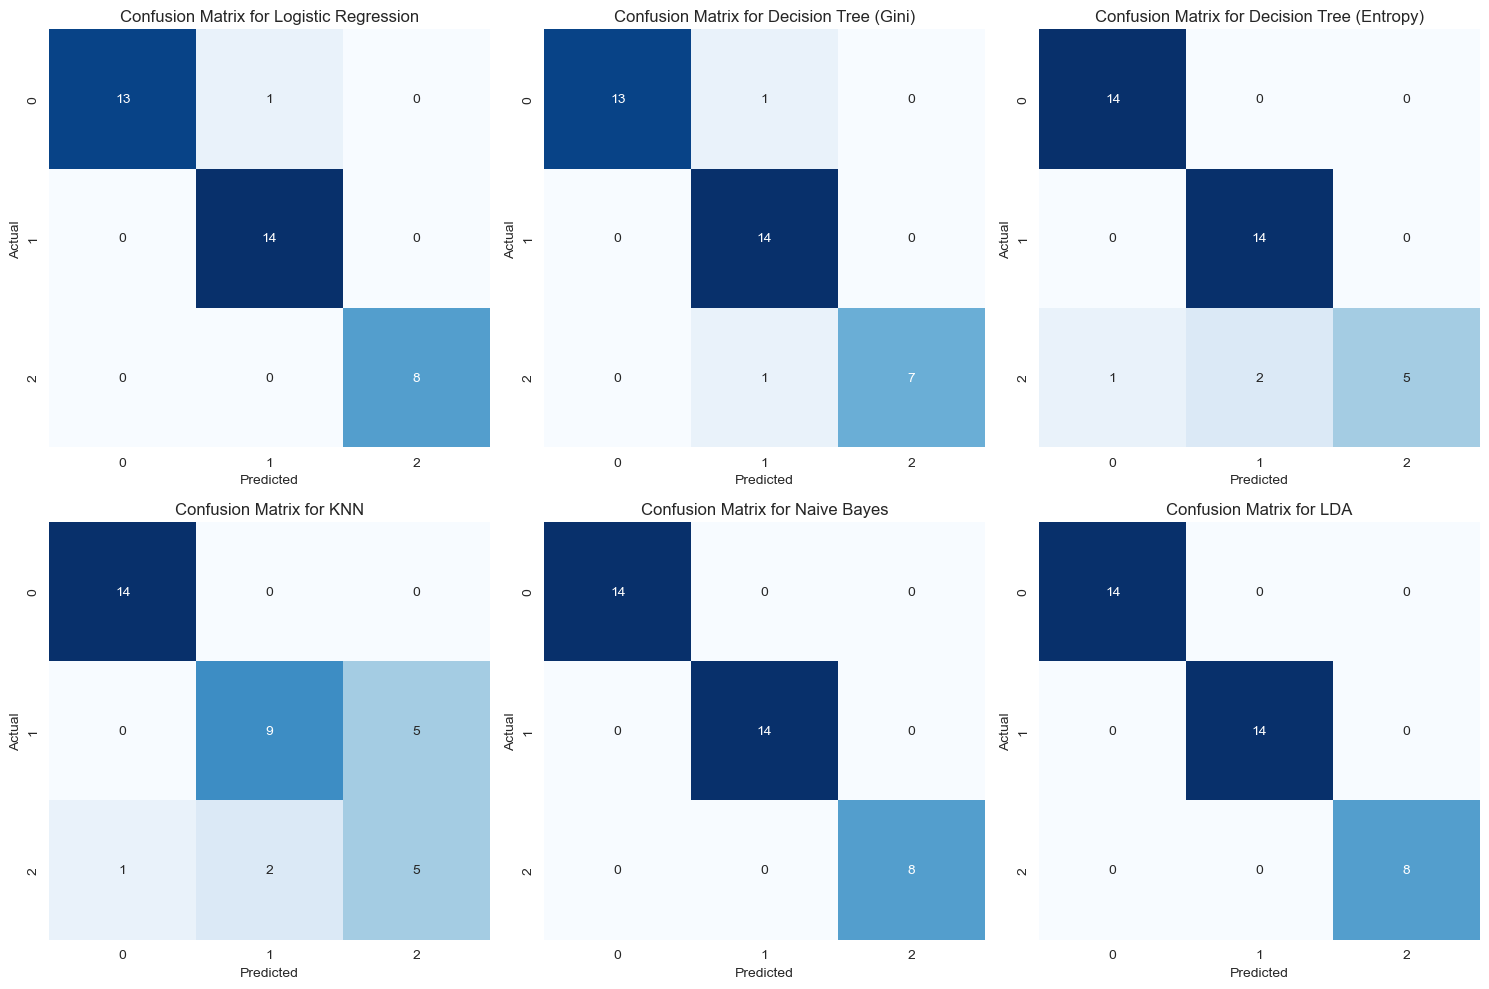

<Figure size 1500x800 with 0 Axes>

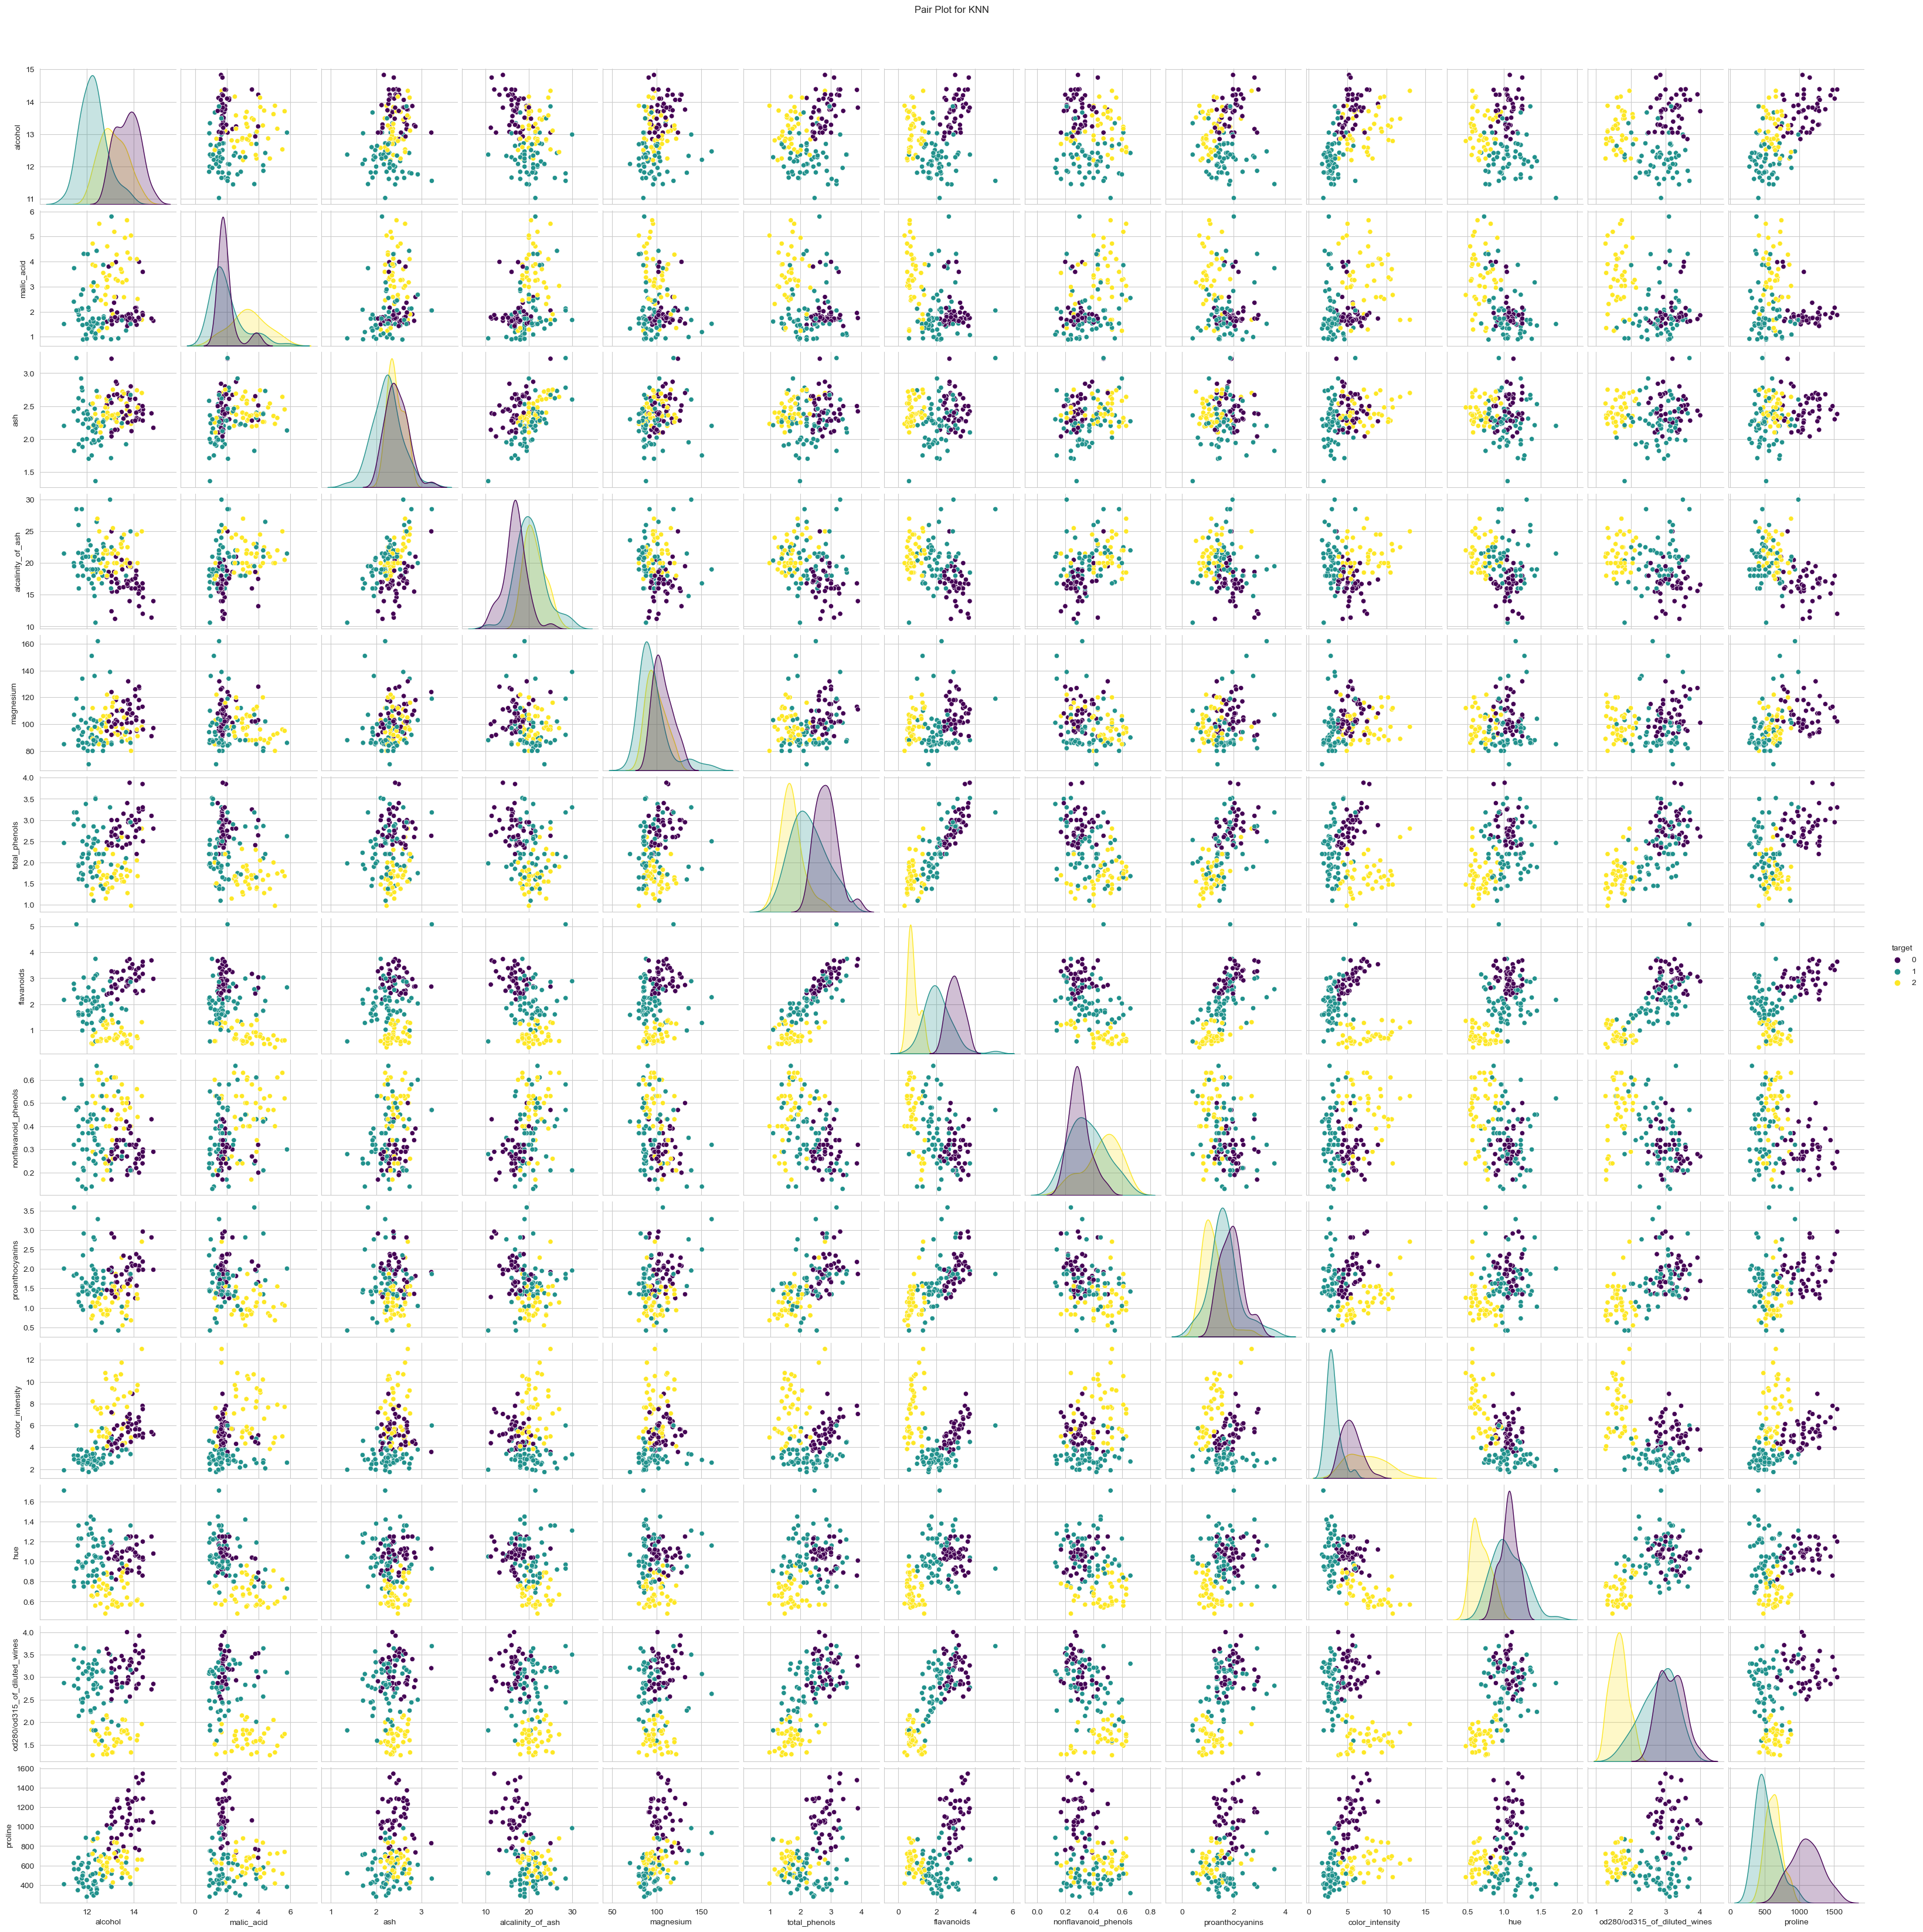

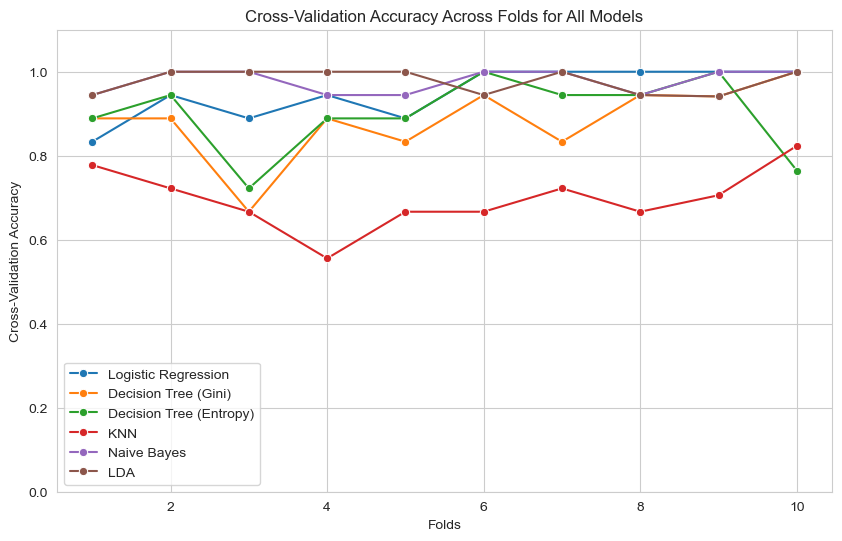


Metrics Before and After Cross-Validation:
                     Model  Accuracy Before CV  F1 Score  Precision    Recall  \
0      Logistic Regression            0.972222  0.972187   0.974074  0.972222   
1     Decision Tree (Gini)            0.944444  0.944856   0.951389  0.944444   
2  Decision Tree (Entropy)            0.916667  0.909382   0.925463  0.916667   
3                      KNN            0.777778  0.778936   0.792256  0.777778   
4              Naive Bayes            1.000000  1.000000   1.000000  1.000000   
5                      LDA            1.000000  1.000000   1.000000  1.000000   

   Support                            Cross-Validation Scores  \
0     36.0  [0.8333333333333334, 0.9444444444444444, 0.888...   
1     36.0  [0.8888888888888888, 0.8888888888888888, 0.666...   
2     36.0  [0.8888888888888888, 0.9444444444444444, 0.722...   
3     36.0  [0.7777777777777778, 0.7222222222222222, 0.666...   
4     36.0  [0.9444444444444444, 1.0, 1.0, 0.9444444444444...  

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from scipy import interp

# Load wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target")

# Display all features of the dataset
print("Features of the Wine dataset:")
print(X.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree (Gini)': DecisionTreeClassifier(criterion='gini'),
    'Decision Tree (Entropy)': DecisionTreeClassifier(criterion='entropy'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis()
}

# Optimal value of k for KNN
param_grid_knn = {'n_neighbors': np.arange(1, 30)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
optimal_k = grid_search_knn.best_params_['n_neighbors']

# Optimal depth for Decision Tree
param_grid_tree = {'max_depth': np.arange(1, 20)}
grid_search_tree_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini'), param_grid_tree, cv=5)
grid_search_tree_gini.fit(X_train, y_train)
optimal_depth_gini = grid_search_tree_gini.best_params_['max_depth']

grid_search_tree_entropy = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid_tree, cv=5)
grid_search_tree_entropy.fit(X_train, y_train)
optimal_depth_entropy = grid_search_tree_entropy.best_params_['max_depth']

# Optimal parameter for Logistic Regression
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5)
grid_search_logistic.fit(X_train, y_train)
optimal_c_logistic = grid_search_logistic.best_params_['C']

# Optimal parameter for Naive Bayes
optimal_params_naive_bayes = {}  # Naive Bayes typically doesn't require hyperparameter tuning

# Optimal parameter for LDA
optimal_params_lda = {}  # LDA typically doesn't have many hyperparameters to tune

# Evaluate models
model_results = {}

# Data for ROC curve
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0

# Data for Cross-Validation Accuracy vs Folds
cv_accuracies = {}

# Data for Cross-Validation Mean
cv_means = []

# Data for Confusion Matrices
confusion_matrices = {}

# Data for feature importances
feature_importances = {}

# Data for probability distributions
probability_distributions = {}

# Data for Accuracy Before Cross-Validation
accuracy_before_cv = {}

# Data for F1 Score
f1_scores = {}

# Data for Precision
precision_scores = {}

# Data for Recall
recall_scores = {}

# Data for Support
support_data = {}

# Data for Cross-Validation Scores
cv_scores_data = {}

# Data for Accuracy After Cross-Validation
accuracy_after_cv = {}

# Optimal Parameters
optimal_parameters = {}

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)

    if name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=optimal_k)
        optimal_parameters[name] = f'n_neighbors = {optimal_k}'
    elif 'Decision Tree' in name:
        if 'Gini' in name:
            model = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth_gini)
            optimal_parameters[name] = f'max_depth = {optimal_depth_gini}'
        else:
            model = DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth_entropy)
            optimal_parameters[name] = f'max_depth = {optimal_depth_entropy}'
    elif name == 'Logistic Regression':
        model = LogisticRegression(C=optimal_c_logistic)
        optimal_parameters[name] = f'C = {optimal_c_logistic}'
    else:
        optimal_parameters[name] = None

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
        feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
        print(f"\nFeature Importances for {name}:")
        print(feature_importances_df)

    # Probability Distributions
    probability_distributions[name] = model.predict_proba(X_test)

    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = confusion

    # Cross-validation across several folds
    cv_scores = cross_val_score(model, X, y, cv=10)
    cv_mean = np.mean(cv_scores)
    cv_accuracies[name] = cv_scores
    cv_means.append(cv_mean)  # Save Cross-Validation Mean

    # ROC curve and AUC
    y_scores = model.predict_proba(X_test)
    y_binarized = label_binarize(y_test, classes=[0, 1, 2])

    fpr, tpr, _ = roc_curve(y_binarized.ravel(), y_scores.ravel())
    mean_tpr += np.interp(all_fpr, fpr, tpr)

    roc_auc = auc(fpr, tpr)

    # Save results
    model_results[name] = {
        'Model': model,
        'Accuracy Before CV': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'Support': classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)['macro avg']['support'],
        'Cross-Validation Scores': cv_scores,
        'Accuracy After CV': cv_mean,
        'ROC Curve': (fpr, tpr, roc_auc),
        'Optimal Parameters': optimal_parameters[name]
    }

    # Save metrics for table data
    accuracy_before_cv[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    support_data[name] = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)['macro avg']['support']
    cv_scores_data[name] = cv_scores
    accuracy_after_cv[name] = cv_mean

    # Plot Decision Tree for Decision Tree model
    if 'Decision Tree' in name:
        plt.title(f'Decision Tree - {name.split(" ")[-1]} - Depth {optimal_depth_gini if "Gini" in name else optimal_depth_entropy}')
        plot_tree(model, filled=True, feature_names=X.columns, class_names=wine.target_names)

        # Save PDF for Decision Trees
        plt.figure(figsize=(10, 5))
        plot_tree(model, filled=True, feature_names=X.columns, class_names=wine.target_names)
        plt.title(f'Decision Tree - {name.split(" ")[-1]} - Optimal Depth')
        plt.savefig(f'decision_tree_{name.lower().replace(" ", "_")}.pdf', format='pdf', bbox_inches='tight')

# Display Confusion Matrices using seaborn
plt.figure(figsize=(15, 10))
for i, (name, confusion) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')

plt.tight_layout()
plt.show()

# Display Pair Plot for KNN
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
X_train_knn = X_train.copy()
X_train_knn['target'] = y_train
plt.figure(figsize=(15, 8))
sns.pairplot(X_train_knn, hue='target', palette='viridis')
plt.suptitle('Pair Plot for KNN', y=1.02)
plt.show()

# Display Histogram for Probability Distribution of Naive Bayes
plt.figure(figsize=(10, 6))
for class_label in range(probability_distributions['Naive Bayes'].shape[1]):
    plt.subplot(2, 3, class_label + 1)
    sns.histplot(probability_distributions['Naive Bayes'][:, class_label], bins=20, kde=True, label='Naive Bayes', alpha=0.7)
    plt.title(f'Class {class_label} - Naive Bayes')

plt.tight_layout()
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

# Display ROC curve for all models
plt.figure(figsize=(10, 8))
for name, result in model_results.items():
    plt.plot(result['ROC Curve'][0], result['ROC Curve'][1], label=f'{name} (AUC = {result["ROC Curve"][2]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()

# Display Cross-Validation Accuracy vs Folds for all models in a single plot
plt.figure(figsize=(10, 6))
for name, scores in cv_accuracies.items():
    sns.lineplot(x=range(1, 11), y=scores, label=name, marker='o')

plt.ylim(0.0, 1.1)  # Set y-axis limits
plt.xlabel('Folds')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy Across Folds for All Models')
plt.legend()
plt.show()

# Display Table for Metrics
metrics_table = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy Before CV': list(accuracy_before_cv.values()),
    'F1 Score': list(f1_scores.values()),
    'Precision': list(precision_scores.values()),
    'Recall': list(recall_scores.values()),
    'Support': list(support_data.values()),
    'Cross-Validation Scores': [list(scores) for scores in cv_scores_data.values()],
    'Accuracy After CV': list(accuracy_after_cv.values()),
    'Optimal Parameters': [optimal_parameters.get(model, None) for model in models.keys()]
})

print("\nMetrics Before and After Cross-Validation:")
print(metrics_table)

# Display Classification Report for all models
for name, result in model_results.items():
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, result['Model'].predict(X_test), target_names=wine.target_names))

# Identify the best model based on Cross-Validation Mean
best_model_name = max(model_results, key=lambda k: model_results[k]['Cross-Validation Scores'].mean())
best_model = model_results[best_model_name]

# Display metrics for the best model
print("\nMetrics for the Best Model:")
print(f"Best Model: {best_model_name}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_model['Model'].predict(X_test))}")
print(f"Accuracy Before CV: {best_model['Accuracy Before CV']:.4f}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"Support: {best_model['Support']}")
print(f"Cross-Validation Mean: {best_model['Accuracy After CV']:.4f}")
print(f"Optimal Parameters: {best_model['Optimal Parameters']}")


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LDA model
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda_model.fit_transform(X_train, y_train)

# Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_lda, y_train)

# Plot decision boundary with numerical data
plt.figure(figsize=(12, 8))
plt.title('Scatter Plot with Decision Boundary (SVM) in LDA Space')
plt.xlabel('LD1')
plt.ylabel('LD2')

h = .02  # step size in the mesh
x_min, x_max = X_train_lda[:, 0].min() - 1, X_train_lda[:, 0].max() + 1
y_min, y_max = X_train_lda[:, 1].min() - 1, X_train_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contour plot for decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Scatter plot for data points
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')

# Table with numerical data
table_data = np.column_stack((X_train_lda[:, 0], X_train_lda[:, 1], y_train))
plt.table(cellText=table_data, colLabels=['LD1', 'LD2', 'Class'], loc='bottom', cellLoc='center', bbox=[0, -0.4, 1, 0.25])

# Legend
legend = plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()
